# Data Understanding section

In [19]:
# Data Wrangling
import numpy as np
import pandas as pd

# Vizualizacao
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import ticker

# Others
from sklearn.preprocessing import scale
import calendar

## Collecting data

In [2]:
df = pd.read_csv('./data/data.csv', sep=",", encoding="ISO-8859-1")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Statistical description

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Exploration and visualization

<Axes: ylabel='Quantity'>

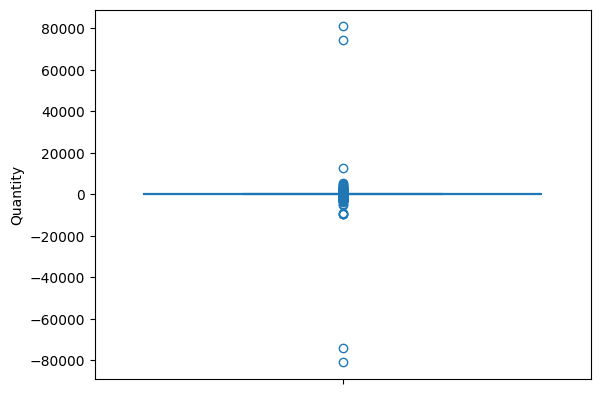

In [5]:
sns.boxplot(data=df['Quantity'], fill = False)

There's a lot of negative values for 'Quantity'. These should be dropped from the dataset.

<Axes: ylabel='UnitPrice'>

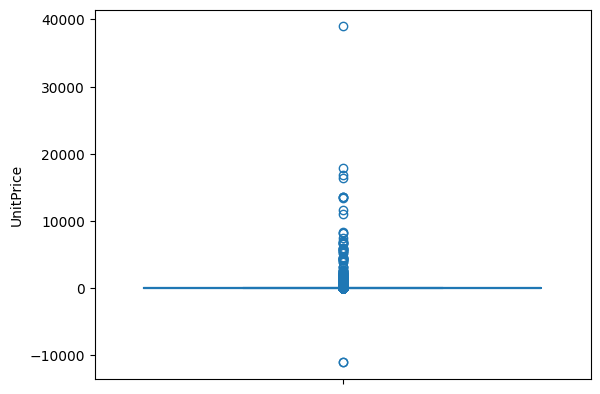

In [6]:
sns.boxplot(data=df['UnitPrice'], fill = False)

There's also some negative values for 'UnitPrice', that will be also dropped from the dataset.

## 10 Top countries in sales

By sales

In [7]:
df[['Country','Quantity']].groupby('Country').count().sort_values(by = 'Quantity', ascending = False).head(10)

,Quantity
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


By quantity of products sold

In [8]:
df[['Country','Quantity']].groupby('Country').agg('sum').sort_values(by = 'Quantity', ascending = False).head(10)

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Duplicated rows and missing values

In [10]:
df.duplicated().sum()

5268

In [17]:
df[df.duplicated(keep=False)].sort_values(by=['InvoiceNo', 'StockCode']).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
565,536412,21448,12 DAISY PEGS IN WOOD BOX,2,12/1/2010 11:49,1.65,17920.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [18]:
df.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [11]:
df['CustomerID'].isna().sum()

135080

In [12]:
df['Description'].isna().sum()

1454

Missing values are only on 'CustomerID' and 'Description' columns.

In [20]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [31]:
df_quantity = df[['Country','Quantity']]\
    .groupby('Country')\
    .agg('sum')\
    .sort_values(by = 'Quantity', ascending = False)\
    .iloc[0:10]

In [32]:
df_sold = df[['Country','Quantity']]\
    .groupby('Country')\
    .count()\
    .sort_values(by = 'Quantity', ascending = False)\
    .iloc[0:10]

## Graphics for sales

Countries with more sales

C:\Users\Matheus\AppData\Local\Temp\ipykernel_19208\1767539306.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


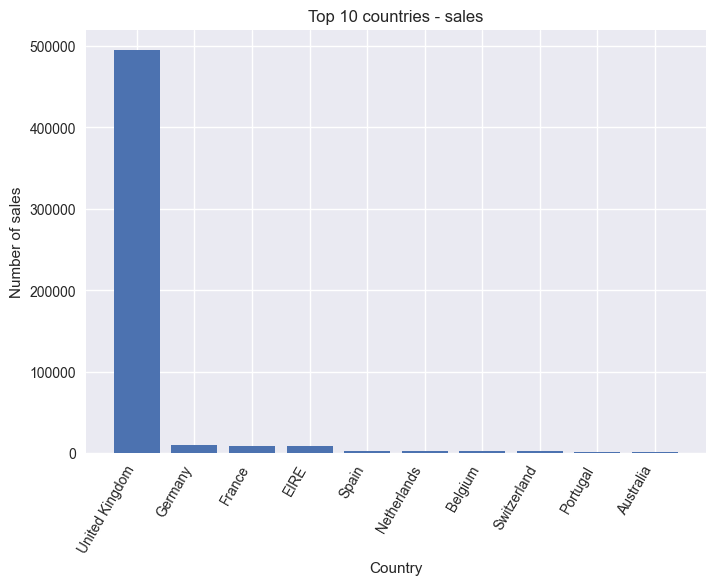

In [33]:
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);

def graphic_plot(x_axis, y_axis, xlabel_str, y_label_str, title, color = None):
  plt.style.use('seaborn');
  fig, ax = plt.subplots();
  plt.bar(x_axis, y_axis, color = color);
  plt.xticks(rotation=60, ha = 'right');
  plt.xlabel(xlabel_str);
  plt.ylabel(y_label_str);
  plt.title(title);
  ax.yaxis.set_major_formatter(formatter);

graphic_plot(df_sold.index,
             df_sold['Quantity'],
             'Country','Number of sales', 'Top 10 countries - sales')

C:\Users\Matheus\AppData\Local\Temp\ipykernel_19208\1767539306.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


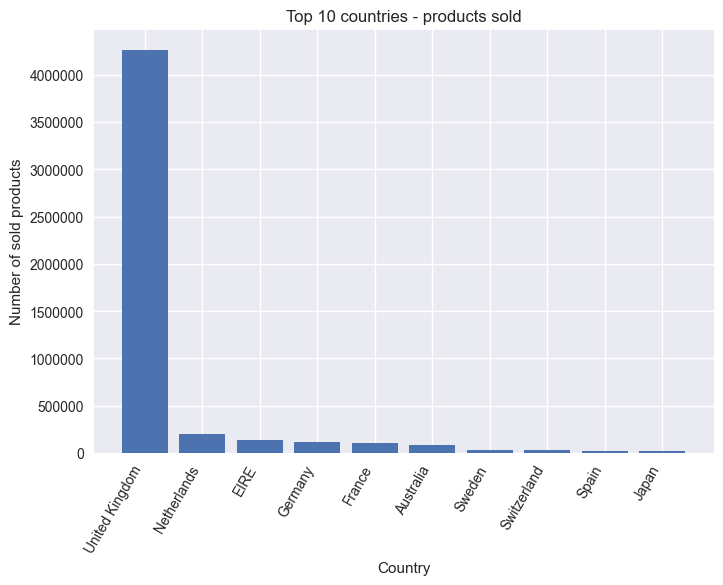

In [34]:
graphic_plot(df_quantity.index,
             df_quantity['Quantity'],
             'Country','Number of sold products', 'Top 10 countries - products sold')

In [35]:
# Top 10 products
top_products = (
    df.groupby('Description')['Quantity']
    .agg('sum')
    .sort_values(ascending = False)
    .iloc[0:10].reset_index()
)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_19208\1767539306.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


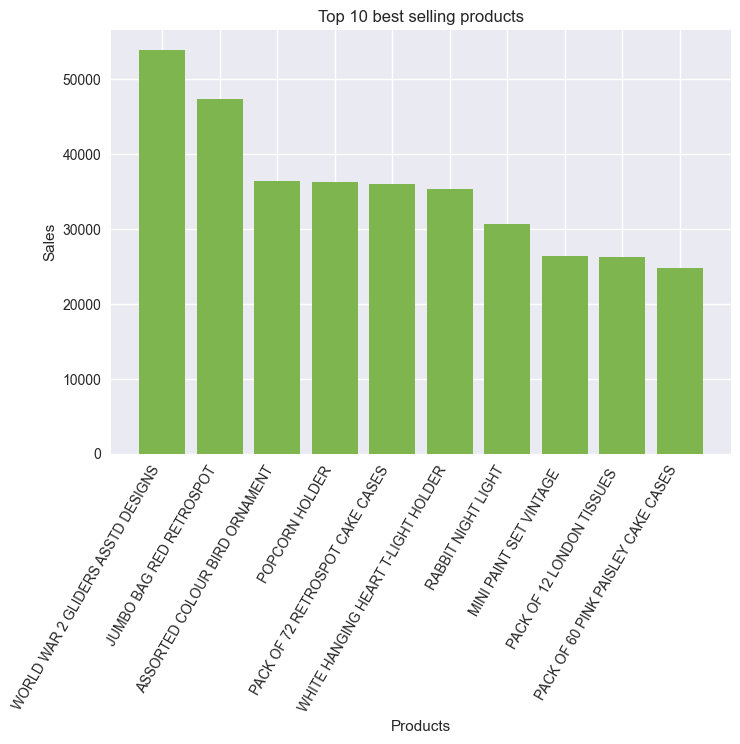

In [36]:
graphic_plot(top_products['Description'],
             top_products['Quantity'],
             'Products', 'Sales', 'Top 10 best selling products', color = '#7eb54e')

In [37]:
sales_month = df.copy()
sales_month.index = sales_month['InvoiceDate']

sales_month = (
    sales_month.groupby(by=[sales_month.index.month])['Quantity']
    .count()
    .reset_index()
)

sales_month['InvoiceDate'] = sales_month['InvoiceDate'].apply(lambda x: calendar.month_name[x])

C:\Users\Matheus\AppData\Local\Temp\ipykernel_19208\1767539306.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


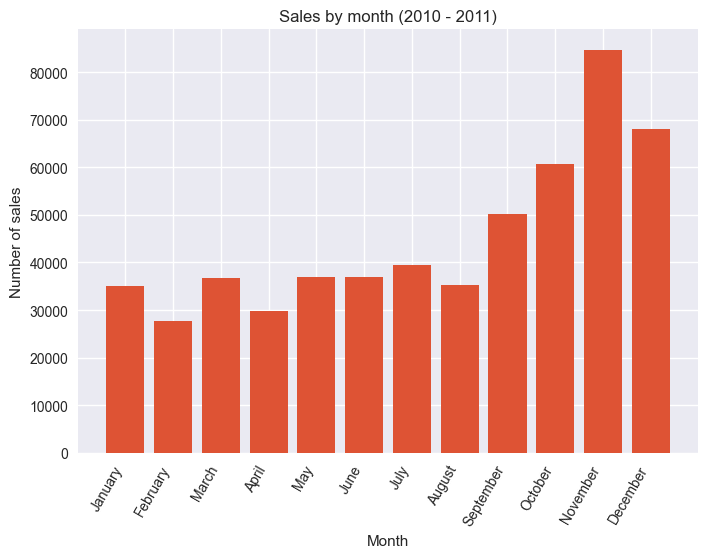

In [38]:
graphic_plot(sales_month['InvoiceDate'],
             sales_month['Quantity'],
             'Month', 'Number of sales', 'Sales by month (2010 - 2011)', color = '#DE5334')